In [5]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Create model dictionary

In [2]:
def create_model_dict():
    model_dict_reg = {}
    model_dict_clf = {}
    model_dict = {'regression':model_dict_reg, 'classification':model_dict_clf}
    
    model_dict_reg['ridge'] = (ridge_regression_pipeline, ridge_regression_parameters)
    model_dict_reg['lasso'] = (lasso_regression_pipeline, lasso_regression_parameters)
    model_dict_reg['en'] = (elastic_net_regression_pipeline, elastic_net_regression_parameters)
    model_dict_reg['knn'] = (knn_regression_pipeline, knn_regression_parameters)
    
    model_dict_clf['knn'] = (knn_classification_pipeline, knn_classification_parameters)
    model_dict_clf['svm'] = (svm_classification_pipeline, svm_classification_parameters)
    model_dict_clf['lda'] = (lda_classification_pipeline, lda_classification_parameters)
    model_dict_clf['qda'] = (qda_classification_pipeline, qda_classification_parameters)
    
    return model_dict

## Grid Search

In [3]:
def grid_search(X, Y, pipeline_name, pipeline_type, params=None, keep=None):
    pipeline, parameters = model_dict[pipeline_type][pipeline_name]
    if params:
        for key in params:
            params[key] = [params[key]]
        params[keep] = parameters[keep]
        parameters = params
    if pipeline_type == 'regression':
        grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='neg_mean_squared_error')
        grid.fit(X, Y)
        return -grid.best_score_, grid.best_estimator_, grid.best_params_, grid.cv_results_['mean_test_score']*-1
    elif pipeline_type == 'classification':
        grid = GridSearchCV(estimator=pipeline, param_grid=parameters, scoring='accuracy', cv=10)
        grid.fit(X, Y)
        return grid.best_score_, grid.best_estimator_, grid.best_params_, grid.cv_results_['mean_test_score']

In [48]:
def create_confusion_matrix(model, X, Y):
    skf = StratifiedKFold()
    train_index, test_index = list(skf.split(X, Y))[-3]
    X_train = X[train_index]
    y_train = Y[train_index]
    X_test = X[test_index]
    y_test = Y[test_index]

    best_original_model.fit(X_train, y_train)
    y_hat = best_original_model.predict(X_test)
    
    return confusion_matrix(y_test, y_hat)

In [60]:
def plotConfusionMatrix(cm, name, alphabet=["2", "4", "5", "6", "7", "8", "9", "10"]):
    """
    Input
    cm: confusion matrix (true labels vs. predicted labels)
    alphabet: names of class labels

    Output
    Plot confusion matrix (true labels vs. predicted labels)
    """

    fig = plt.figure()
    plt.clf()                       # Clear plot
    ax = fig.add_subplot(111)       # Add 1x1 grid, first subplot
    ax.set_aspect(1)
    res = ax.imshow(cm, cmap=plt.cm.binary,
                    interpolation='nearest', vmin=0, vmax=6)

    plt.colorbar(res)               # Add color bar

    width = len(cm)                 # Width of confusion matrix
    height = len(cm[0])             # Height of confusion matrix

    # Annotate confusion entry with numeric value
    for x in range(width):
        for y in range(height):
            ax.annotate(str(cm[x][y]), xy=(y, x), horizontalalignment='center',
                        verticalalignment='center', color=getFontColor(cm[x][y]))


    # Plot confusion matrix (true labels vs. predicted labels)
    plt.xticks(range(width), alphabet[:width], rotation=90)
    plt.yticks(range(height), alphabet[:height])
    plt.title(name + " Classification\nConfusion Matrix")
    plt.savefig(name + "_classification_cfm.png", dpi=500)
    plt.show()
def getFontColor(value):
    """
    Input
    value: confusion entry value

    Output
    font color for confusion entry
    """
    if value < -1:
        return "black"
    else:
        return "white"

## MAIN

In [36]:
%run pipelines.py
%run parameters.py
%run util.py
np.random.seed(0)
pipeline_type = 'classification'
X_raw_c,Y_raw_c = load_data(pipeline_type, raw=True, gamma=False, rotate=False, mixed=False)
X_gamma_c,Y_gamma_c = load_data(pipeline_type, raw=False, gamma=True, rotate=False, mixed=False)
X_rot_c,Y_rot_c = load_data(pipeline_type, raw=False, gamma=False, rotate=True, mixed=False)
X_mix_c,Y_mix_c = load_data(pipeline_type, raw=False, gamma=False, rotate=False, mixed=True)

X_all_c = [X_raw_c, X_gamma_c, X_rot_c, X_mix_c]
Y_all_c = [Y_raw_c, Y_gamma_c, Y_rot_c, Y_mix_c]

### SVM

0.977777777778 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=0.251, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
[ 0.9         0.97777778  0.97777778  0.97777778  0.97777778]



0.955555555556 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=0.501, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
[ 0.87777778  0.92222222  0.95555556  0.94444444  0.94444444]



0.877777777778 Pipeline(memory=None,

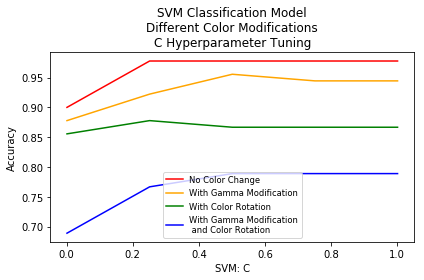

TypeError: plotConfusionMatrix() missing 1 required positional argument: 'name'

In [38]:
%run pipelines.py
%run parameters.py
%run util.py

C_range = np.arange(.001,1.02,.25)

model_dict = create_model_dict()

pipeline_name = 'svm'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()

best_original_model = None

for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    if i == 1:
        best_original_model = m
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'svm__C')
    plt.plot(C_range, all_scores, label=names[i], color=colors[i])
    print(score, m)
    print(all_scores)
    print('\n\n')



from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

plt.legend(prop=fontP)
plt.xlabel("SVM: C")
plt.ylabel("Accuracy")
plt.title('SVM Classification Model\nDifferent Color Modifications\nC Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("svm_classification.png", dpi=500)
plt.show()


cfm = create_confusion_matrix(best_original_model, X_all_c[0], Y_all_c[0])
plotConfusionMatrix(cfm, "SVM")

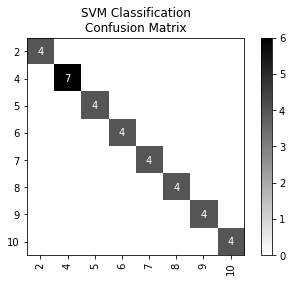

In [44]:
cfm = create_confusion_matrix(best_original_model, X_all_c[0], Y_all_c[0])
plotConfusionMatrix(cfm, "SVM")

### LDA

1.0 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
[ 0.85555556  0.87777778  0.91111111  0.94444444  0.94444444  0.93333333
  0.93333333  0.94444444  0.95555556  0.98888889  0.98888889  1.        ]



0.955555555556 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))])
[ 0.26666667  0.76666667  0.85555556  0.88888889  0.86666667  0.86666

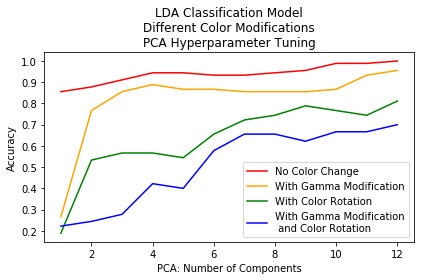

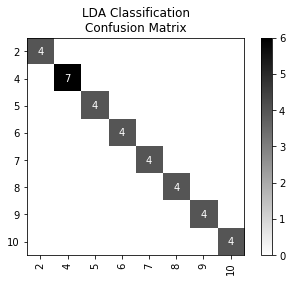

In [49]:
%run pipelines.py
%run parameters.py
%run util.py

s_range = np.arange(1, 13)

model_dict = create_model_dict()

pipeline_name = 'lda'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()
best_original_model = None
for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    if i == 1:
        best_original_model = m
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'pca__n_components')
    plt.plot(s_range, all_scores, label=names[i], color=colors[i])
    print(score, m)
    

    print(all_scores)
    print('\n\n')
plt.legend()
plt.xlabel("PCA: Number of Components")
plt.ylabel("Accuracy")
plt.title('LDA Classification Model\nDifferent Color Modifications\nPCA Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("lda_classification.png", dpi=500)
plt.show()

cfm = create_confusion_matrix(best_original_model, X_all_c[0], Y_all_c[0])
plotConfusionMatrix(cfm, "LDA")

### KNN

0.922222222222 Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])
[ 0.92222222  0.91111111  0.9         0.88888889  0.9         0.86666667
  0.91111111  0.9         0.87777778  0.84444444  0.88888889  0.86666667
  0.85555556  0.83333333  0.83333333]



0.844444444444 Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])
[ 0.84444444  0.82222222  0.73333333  0.76666667  0.72222222  0.68888889
  0.68888889  0.64444444  0.64444444  0.65555556  0.67777778  0.63333333
  0.62222222  0.63333333  0.58888889]



0.788888888889 Pipeline(memory=None,
     steps=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neigh

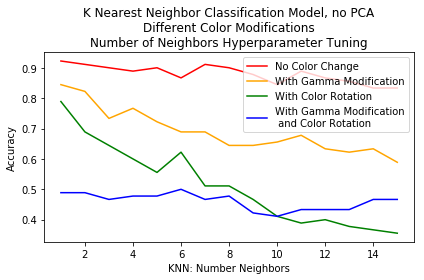

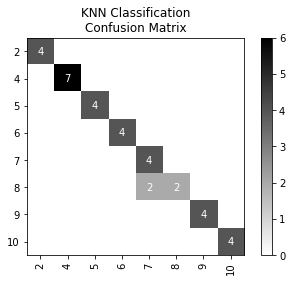

In [58]:
%run pipelines.py
%run parameters.py
%run util.py

nn = np.arange(1, 16)

model_dict = create_model_dict()

pipeline_name = 'knn'
pipeline_type = 'classification'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.cla()
best_original_model = None
for i in range(len(names)):
    X = X_all_c[i]
    Y = Y_all_c[i]
    if i == 1:
        best_original_model = m
    score,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'knn__n_neighbors')
    plt.plot(nn, all_scores, label=names[i], color=colors[i])
    print(score, m)
    print(all_scores)
    print('\n\n')
plt.legend()
plt.xlabel("KNN: Number Neighbors")
plt.ylabel("Accuracy")
plt.title('K Nearest Neighbor Classification Model, no PCA\nDifferent Color Modifications\nNumber of Neighbors Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("knn_classification2.png", dpi=500)
plt.show()

cfm = create_confusion_matrix(best_original_model, X_all_c[0], Y_all_c[0])
plotConfusionMatrix(cfm, "KNN")

## Regression

In [59]:
%run pipelines.py
%run parameters.py
%run util.py
np.random.seed(0)
pipeline_type = 'regression'
X_raw_r,Y_raw_r = load_data(pipeline_type, raw=True, gamma=False, rotate=False, mixed=False)
X_gamma_r,Y_gamma_r = load_data(pipeline_type, raw=False, gamma=True, rotate=False, mixed=False)
X_rot_r,Y_rot_r = load_data(pipeline_type, raw=False, gamma=False, rotate=True, mixed=False)
X_mix_r,Y_mix_r = load_data(pipeline_type, raw=False, gamma=False, rotate=False, mixed=True)

X_all_r = [X_raw_r, X_gamma_r, X_rot_r, X_mix_r]
Y_all_r = [Y_raw_r, Y_gamma_r, Y_rot_r, Y_mix_r]

### Ridge

In [ ]:
%run pipelines.py
%run parameters.py
%run util.py

A_range = [.001,.01,.1,1,10]

model_dict = create_model_dict()

pipeline_name = 'ridge'
pipeline_type = 'regression'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.close()
for i in range(len(names)):
    X = X_all_r[i]
    Y = Y_all_r[i]
    _,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    _,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'ridge__alpha')
    plt.plot(np.log10(A_range), all_scores, label=names[i], color=colors[i])
    print(all_scores, m)
    print('\n\n')
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = [6.6,4.4]
plt.legend()

plt.xlabel("Ridge: Lambda (log scale)")
plt.ylabel("MSE")
plt.title('Ridge Regression Model\nDifferent Color Modifications\nLambda Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("ridge_regression3.png", dpi=500)
plt.show()

### KNN

0.0463992592593 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'))])



0.0741658267617 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance'))])



0.197450392777 Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0

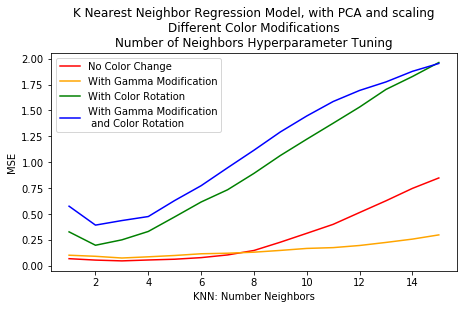

In [63]:
%run pipelines.py
%run parameters.py
%run util.py

nn = np.arange(1, 16)

model_dict = create_model_dict()

pipeline_name = 'knn'
pipeline_type = 'regression'
names = ["No Color Change", "With Gamma Modification", "With Color Rotation", "With Gamma Modification\n and Color Rotation"]
colors = ['r','orange','g','b']
plt.close()
for i in range(len(names)):
    X = X_all_r[i]
    Y = Y_all_r[i]
    _,m,best_params,_ = grid_search(X, Y, pipeline_name, pipeline_type)
    s,_,_,all_scores = grid_search(X, Y, pipeline_name, pipeline_type, best_params, 'knn__n_neighbors')
    plt.plot(nn, all_scores, label=names[i], color=colors[i])
    print(s, m)
    print('\n\n')
plt.tight_layout()
plt.rcParams["figure.figsize"] = [6.6,4.4]

plt.legend()

plt.xlabel("KNN: Number Neighbors")
plt.ylabel("MSE")
plt.title('K Nearest Neighbor Regression Model, with PCA and scaling\nDifferent Color Modifications\nNumber of Neighbors Hyperparameter Tuning')
plt.tight_layout()
plt.savefig("knn_regression.png", dpi=500)

plt.show()